# Processing Steps

<ol>1. Load data</ol>
<ol>2. Explore data</ol>
<ol>3. Modify data</ol>
<ol>4. Missing values</ol>
<ol>5. Feature Engineering</ol>
<ol>6. Converting categories to numbers</ol>
<ol>7. Scale data</ol>
<ol>8. Modeling</ol>

**Don't forget to:  'conda activate deep' first!**

In [208]:
# Remeber to install the kernel so it is availble in Jupyer Lanb/Notebooks
# python -m ipykernel install --user --name deep --display-name "deep"

In [209]:
# importing the required libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [210]:
# checking the version of keras
import keras
print(keras.__version__)

2.4.3


In [211]:
# checking the version of tensorflow
import tensorflow as tf
print(tf.__version__)

2.3.0


In [212]:
# ! pip install siuba
# from siuba import *

In [213]:
# ! pip install plotnine
# from plotnine import *

In [214]:
# Not sure what this does.  Perhaps the code relies in an older version of Tensorflow?
# %tensorflow_version 1.x

In [215]:
# Below uasing boostrap formating.  See https://www.w3schools.com/bootstrap/bootstrap_alerts.asp

<div class="alert alert-block alert-info"><H2>1. Load Data</H2></div>

In [216]:
# Data downloaded from here: https://datahack.analyticsvidhya.com/contest/big-mart-sales-prediction/
# Available locally here:  C:\Users\czwea\Analytics_Vidhya\Fundamentals Deep Learning\Module 9 - Overview of tools for deep learning
train = pd.read_csv('train_BigMart.csv')
test = pd.read_csv('test_BigMart.csv')

In [217]:
train['source']='train'
test['source']='test'
data_all = pd.concat([train, test], ignore_index = True)

print('All Data: ', data_all.shape, '\ntrain: ', train.shape, '\ntest: ', test.shape)

All Data:  (14204, 13) 
train:  (8523, 13) 
test:  (5681, 12)


- Item_Identifier: Unique product ID
- Item_Weight: Weight of product
- Item_Fat_Content: Whether the product is low fat or not
- Item_Visibility: The % of total display area of all products in a store allocated to the particular product
- Item_Type: The category to which the product belongs
- Item_MRP: Maximum Retail Price (list price) of the product
- Outlet_Identifier: Unique store ID
- Outlet_Establishment_Year: The year in which store was established
- Outlet_Size: The size of the store in terms of ground area covered
- Outlet_Location_Type: The type of city in which the store is located
- Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket
- Item_Outlet_Sales: Sales of the product in the particular store. This is the outcome variable to be predicted.

In [218]:
# looking at the first five rows of the data
data_all.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


<div class="alert alert-block alert-info"><H2>2. Explore Data</H2></div>

In [219]:
data_all.drop('Item_Outlet_Sales', axis = 1).describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,11765.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681
std,4.652502,0.051459,62.086938,8.371664
min,4.555000,0.000000,31.290000,1985.000000
25%,8.710000,0.027036,94.012000,1987.000000
50%,12.600000,0.054021,142.247000,1999.000000
75%,16.750000,0.094037,185.855600,2004.000000
max,21.350000,0.328391,266.888400,2009.000000


Note `Item_Visibility` min value 0.00.

In [220]:
# data types of the variables
data_all.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
dtype: object

In [221]:
# checking missing values in the data exept for the sales since that is not in the test data
data_all.drop('Item_Outlet_Sales', axis = 1).isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
source                          0
dtype: int64

In [222]:
data_all.nunique()

Item_Identifier               1559
Item_Weight                    415
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      3
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3493
source                           2
dtype: int64

In [223]:
# freq of each different category in each nomical value

# filter the categorical variables
categorical_columns = [x for x in data_all.dtypes.index if data_all.dtypes[x]=='object']

# exclude the id and source columns
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier', 'Outlet_Identifier', 'source']]

# print the frequency of categories
for col in categorical_columns:
    print('\nFrequency of Categories for variable %s'%(col))
    print(data_all[col].value_counts())


Frequency of Categories for variable Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for variable Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of Categories for variable Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

Frequency of Categories for variable Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int6

In [224]:
def relations(x):
    Outlet_Identifier_Pivot = data_all.pivot_table(index=x, values='Item_Outlet_Sales', aggfunc=np.median)
    Outlet_Identifier_Pivot.plot(kind='bar')
    plt.xlabel(x)
    plt.ylabel('Item_Outlet_Sales')
    plt.show()

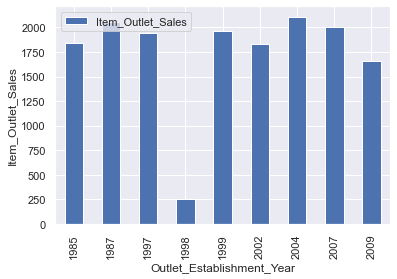

In [225]:
relations('Outlet_Establishment_Year')

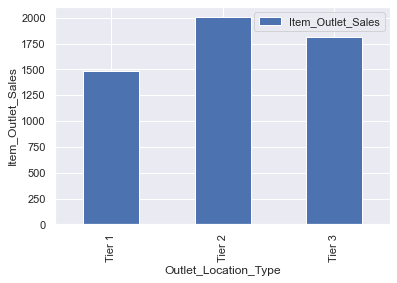

In [226]:
relations('Outlet_Location_Type')

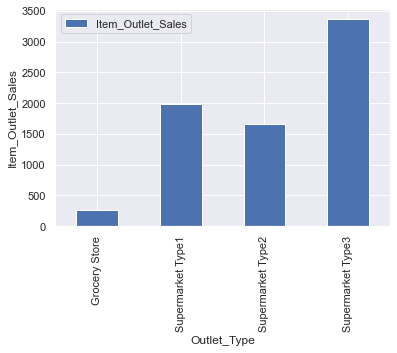

In [227]:
relations('Outlet_Type')

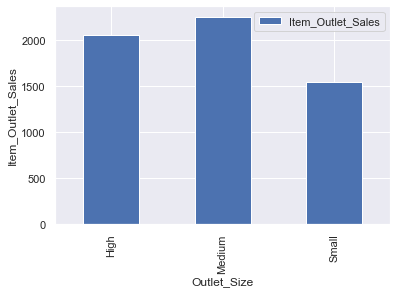

In [228]:
relations('Outlet_Size')

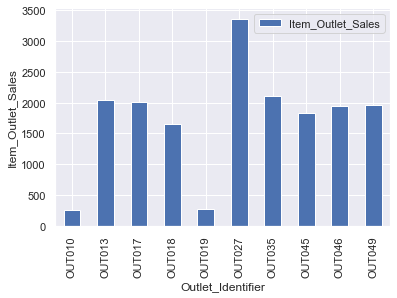

In [229]:
relations('Outlet_Identifier')

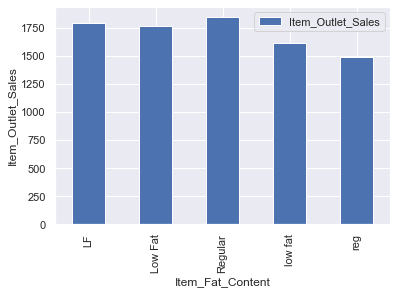

In [230]:
relations('Item_Fat_Content')

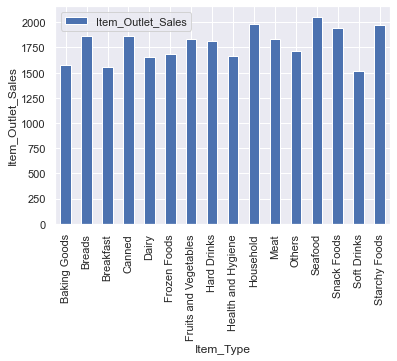

In [231]:
relations('Item_Type')

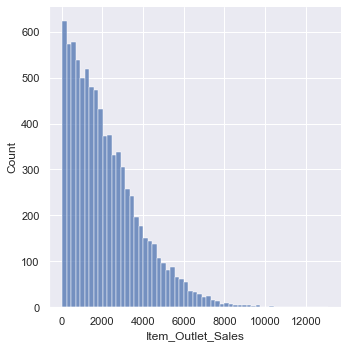

In [232]:
sns.displot(data_all['Item_Outlet_Sales'])

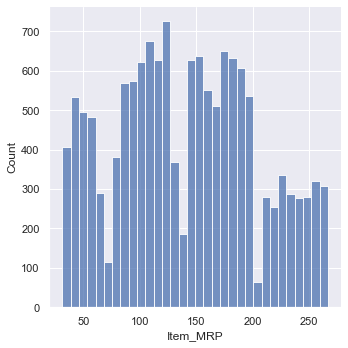

In [233]:
sns.displot(data_all['Item_MRP'])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

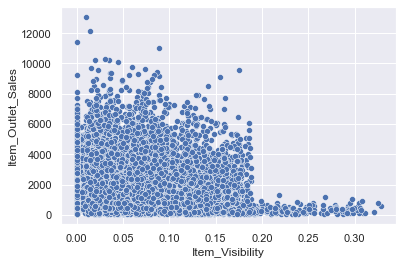

In [234]:
sns.scatterplot(x = "Item_Visibility", y = "Item_Outlet_Sales", data = data_all)

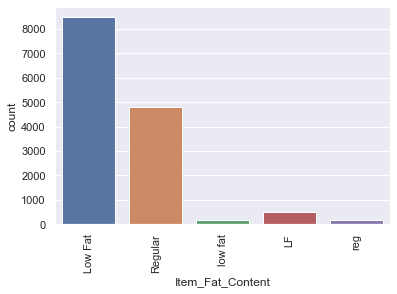

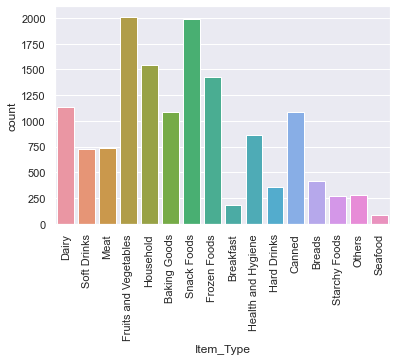

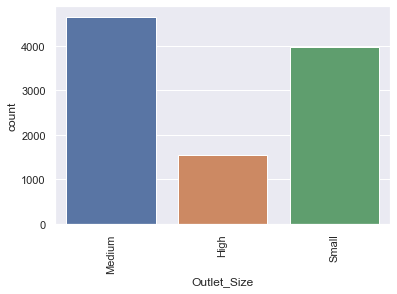

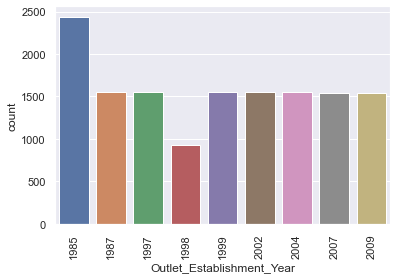

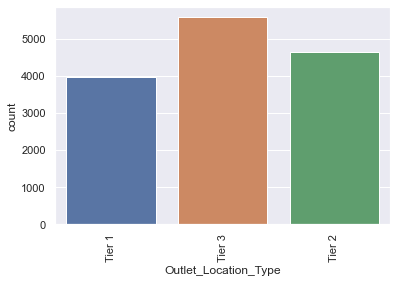

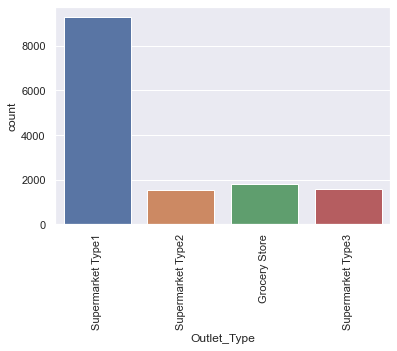

In [235]:
cat = ['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Establishment_Year',
            'Outlet_Location_Type','Outlet_Type']
for i in cat:
    chart = sns.countplot(data_all[i])
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

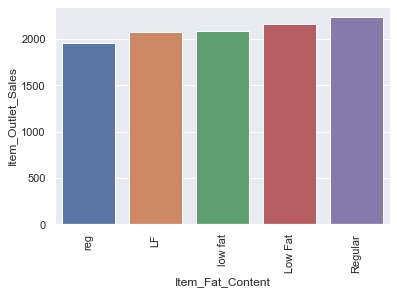

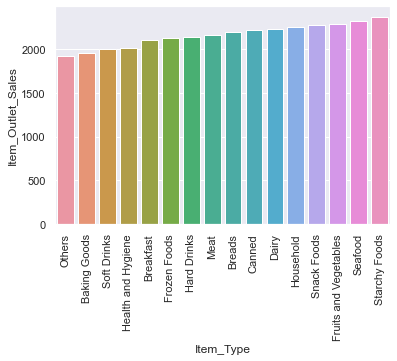

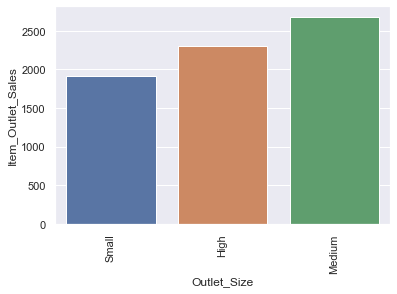

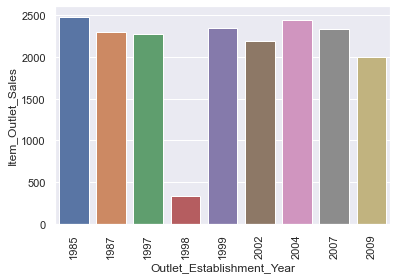

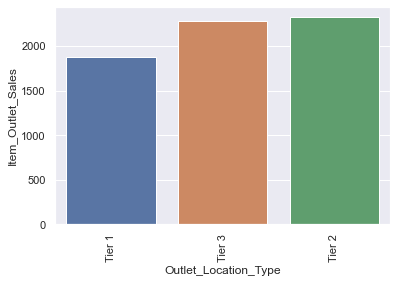

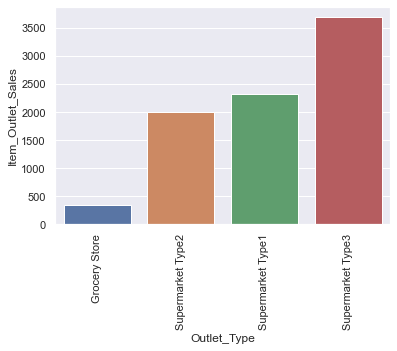

In [236]:
for i in cat:
    b = pd.pivot_table(data_all, index=i, values = 'Item_Outlet_Sales').sort_values(by = 'Item_Outlet_Sales')
    chart = sns.barplot(x = b.index, y = b['Item_Outlet_Sales'])
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()
    
# Regular and Low fat items have almost similar sales
# Outlet 10 and 19 have low sales whereas 27 has highest
# Outletd of 1988 have low sales
# Grocery stores have lower sales

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Type'>

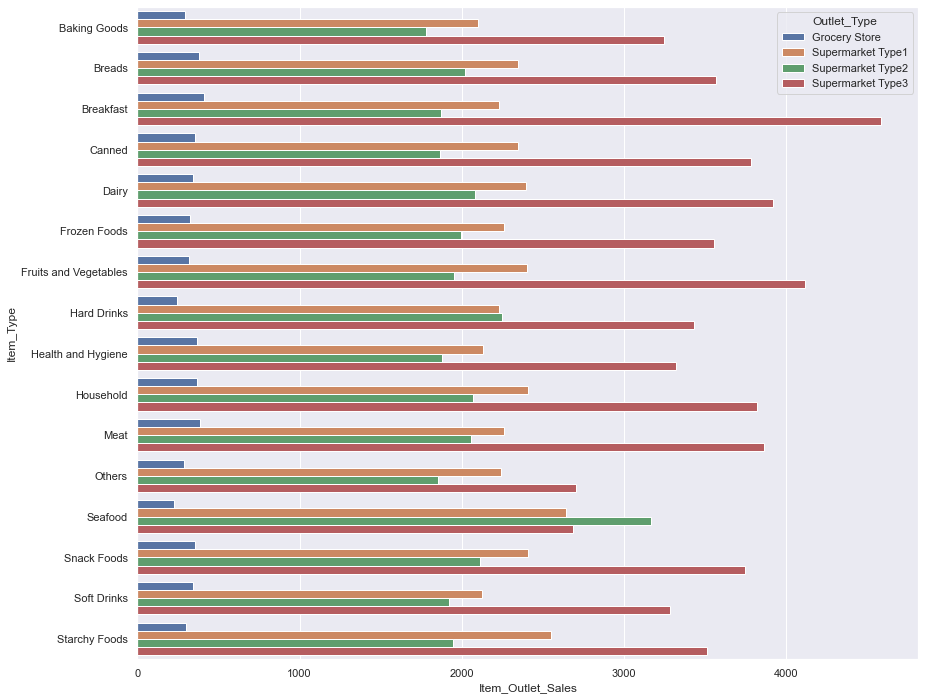

In [237]:
mart = data_all[["Item_Outlet_Sales","Item_Type","Item_Visibility","Outlet_Type"]].groupby(["Item_Type","Outlet_Type"]).mean().reset_index()

plt.figure(figsize = (14, 12))
sns.barplot(x="Item_Outlet_Sales",y = "Item_Type", hue="Outlet_Type", data=mart)

<div class="alert alert-block alert-info"><H2>3. Modify Data</H2></div>

In [238]:
# Fix Item_Fat_Content
data_all.Item_Fat_Content = data_all.Item_Fat_Content.replace({'reg':'Regular', 'LF':'Low Fat', 'low fat':'Low Fat'})

In [239]:
# Item Identifier first 2 letters suggest categories.
data_all.Item_Identifier.head(10)

0    FDA15
1    DRC01
2    FDN15
3    FDX07
4    NCD19
5    FDP36
6    FDO10
7    FDP10
8    FDH17
9    FDU28
Name: Item_Identifier, dtype: object

In [240]:
data_all['Item_Type_Category'] = data_all['Item_Identifier'].apply(lambda x: x[0:2])
data_all['Item_Type_Category'] = data_all['Item_Type_Category'].map({'FD':'Food', 'NC':'Non_Consumable', 'DR':'Drinks'})
data_all['Item_Type_Category'].value_counts()

Food              10201
Non_Consumable     2686
Drinks             1317
Name: Item_Type_Category, dtype: int64

In [241]:
# data_all.drop(['Item_Identifier'], axis=1, inplace=True)

<div class="alert alert-block alert-info"><H2>4. Missing Values</H2></div>

`Item_Weight` and `Outlet_Size` are missing data.

In [242]:
data_all.drop('Item_Outlet_Sales', axis = 1).isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
source                          0
Item_Type_Category              0
dtype: int64

<AxesSubplot:>

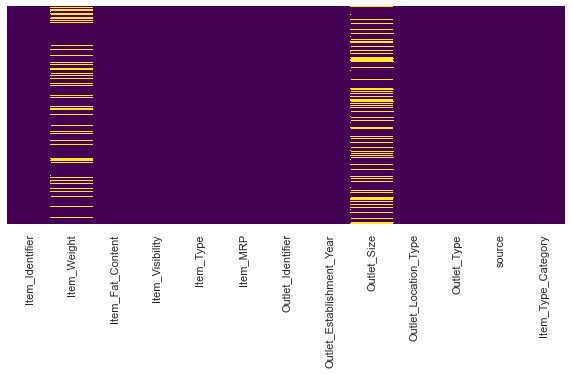

In [243]:
fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(10,4))
sns.heatmap(data_all.drop('Item_Outlet_Sales', axis = 1).isnull(), yticklabels = False, cbar = False, cmap = 'viridis', ax = axs)

In [244]:
# All of these work
# train['Outlet_Size'].isna().sum()
# train.Outlet_Size.isna().sum()
# train['Outlet_Size'].isnull().sum()

### Categorical Data: `Outlet_Size`


In [245]:
# train.groupby(['Outlet_Size', 'Outlet_Location_Type']).apply(lambda x: x.isnull().sum())
data_all.drop('Item_Outlet_Sales', axis = 1).groupby(['Outlet_Type']).apply(lambda x: x.isnull().sum())

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,source,Item_Type_Category
Outlet_Type,,,,,,,,,,,,,
Grocery Store,0,880,0,0,0,0,0,0,925,0,0,0,0
Supermarket Type1,0,0,0,0,0,0,0,0,3091,0,0,0,0
Supermarket Type2,0,0,0,0,0,0,0,0,0,0,0,0,0
Supermarket Type3,0,1559,0,0,0,0,0,0,0,0,0,0,0


In [246]:
data_all.groupby(['Outlet_Location_Type', 'Outlet_Type'])['Outlet_Size'].value_counts(dropna = False)

Outlet_Location_Type  Outlet_Type        Outlet_Size
Tier 1                Grocery Store      Small           880
                      Supermarket Type1  Medium         1550
                                         Small          1550
Tier 2                Supermarket Type1  NaN            3091
                                         Small          1550
Tier 3                Grocery Store      NaN             925
                      Supermarket Type1  High           1553
                      Supermarket Type2  Medium         1546
                      Supermarket Type3  Medium         1559
Name: Outlet_Size, dtype: int64

In [247]:
data_all.groupby(['Outlet_Size'])['Outlet_Location_Type'].value_counts(dropna = False)

Outlet_Size  Outlet_Location_Type
High         Tier 3                  1553
Medium       Tier 3                  3105
             Tier 1                  1550
Small        Tier 1                  2430
             Tier 2                  1550
Name: Outlet_Location_Type, dtype: int64

In [248]:
data_all.groupby(['Outlet_Location_Type', 'Outlet_Size'])['Outlet_Type'].value_counts(dropna = False)

Outlet_Location_Type  Outlet_Size  Outlet_Type      
Tier 1                Medium       Supermarket Type1    1550
                      Small        Supermarket Type1    1550
                                   Grocery Store         880
Tier 2                Small        Supermarket Type1    1550
Tier 3                High         Supermarket Type1    1553
                      Medium       Supermarket Type3    1559
                                   Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

- 3091 `Supermarket Type1` missing `Outlet_Size`
    - all of these are in `Tier 2`
- All `Tier 2` are `Small`.
- All `Grocery Store` are `Small`.


In [249]:
data_all.loc[pd.isnull(data_all.Outlet_Size) & (data_all.Outlet_Location_Type == 'Tier 2'), 'Outlet_Size']='Small'
data_all.loc[pd.isnull(data_all.Outlet_Size) & (data_all.Outlet_Type == 'Grocery Store'), 'Outlet_Size']='Small'

### Continuous Data: `Item_Weight`
Impute the missing values of the `Item_Weight` by the average `Item_Weight` of each `Item_Identifier`.

In [250]:
data_all.drop('Item_Outlet_Sales', axis = 1).groupby(['Outlet_Type']).apply(lambda x: x.isnull().sum())

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,source,Item_Type_Category
Outlet_Type,,,,,,,,,,,,,
Grocery Store,0,880,0,0,0,0,0,0,0,0,0,0,0
Supermarket Type1,0,0,0,0,0,0,0,0,0,0,0,0,0
Supermarket Type2,0,0,0,0,0,0,0,0,0,0,0,0,0
Supermarket Type3,0,1559,0,0,0,0,0,0,0,0,0,0,0


In [251]:
# average weight per item
data_all.pivot_table(values='Item_Weight', index='Item_Identifier').head(10)

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
DRB24,8.785
DRB25,12.300
DRB48,16.750
DRC01,5.920


In [252]:
# Decided to impute missing weights at item level rather than item type level.
# Item_Type_Mean = data_all.pivot_table(columns='Item_Type', values='Item_Weight', aggfunc=lambda x: x.mean())
# Item_Type_Mean

In [253]:
# https://stackoverflow.com/questions/19966018/pandas-filling-missing-values-by-mean-in-each-group
data_all["Item_Weight"] = data_all.groupby("Item_Identifier")["Item_Weight"].transform(lambda x: x.fillna(x.mean()))

In [254]:
# checking missing values after imputation
data_all.drop('Item_Outlet_Sales', axis = 1).isnull().sum()
#train[pd.isnull(train.Outlet_Size)]

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
source                       0
Item_Type_Category           0
dtype: int64

<div class="alert alert-block alert-info"><H2>5. Feature Engineering</H2></div>

### Develop variables from `Item_Identifier`.

In [255]:
data_all.Item_Identifier.head(10)

0    FDA15
1    DRC01
2    FDN15
3    FDX07
4    NCD19
5    FDP36
6    FDO10
7    FDP10
8    FDH17
9    FDU28
Name: Item_Identifier, dtype: object

In [256]:
data_all['Item_Type_Category'] = data_all['Item_Identifier'].apply(lambda x: x[0:2])
data_all['Item_Type_Category'] = data_all['Item_Type_Category'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
data_all['Item_Type_Category'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Category, dtype: int64

### Develop potentially useful information from establishment year

`Outlet_Establisment_Year` can be changed to indicate how long the outlet has been in business.

In [257]:
print("First year of operation: ", data_all.Outlet_Establishment_Year.min(), "\nLast year of operation: ", data_all.Outlet_Establishment_Year.max())

First year of operation:  1985 
Last year of operation:  2009


In [258]:
data_all['Years_Operating'] = 2020 - data_all['Outlet_Establishment_Year']
data_all = data_all.drop('Outlet_Establishment_Year', axis=1)

### New variable from pricing distribution
There appear to be relatively distinct groups of prices:

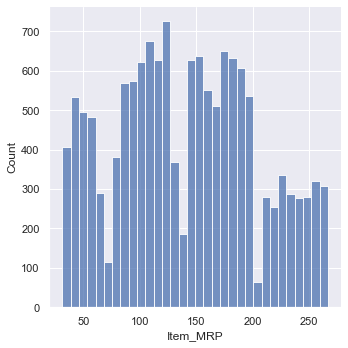

In [259]:
sns.displot(data_all['Item_MRP'])

In [260]:
data_all['Item_Price_Range'] = 'Very High'
data_all.loc[data_all['Item_MRP'] < 202, 'Item_Price_Range'] = 'High'
data_all.loc[data_all['Item_MRP'] < 138, 'Item_Price_Range'] = 'Medium'
data_all.loc[data_all['Item_MRP'] < 72, 'Item_Price_Range'] = 'Low'

data_all['Item_Price_Range'].value_counts()

High         4934
Medium       4659
Very High    2400
Low          2211
Name: Item_Price_Range, dtype: int64

### `Item_Visibility` data imputation
Seems odd that many items have a value of 0 for visibility.

In [261]:
data_all['Item_Visibility'].describe()

count    14204.000000
mean         0.065953
std          0.051459
min          0.000000
25%          0.027036
50%          0.054021
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64

In [262]:
data_all.query('Item_Visibility == 0').shape[0]

879

In [263]:
pd.pivot_table(data_all, index=['Outlet_Identifier'], values=["Item_Visibility"], aggfunc=np.mean)

,Item_Visibility
Outlet_Identifier,
OUT010,0.101939
OUT013,0.060242
OUT017,0.061142
OUT018,0.059976
OUT019,0.107389
OUT027,0.060344
OUT035,0.060826
OUT045,0.060907
OUT046,0.060184


All stores have some visibility data. To predict fit using `Item_Visibility` use the mean for that outlet. 

In [264]:
mean_vis = data_all.groupby('Outlet_Identifier')['Item_Visibility'].transform('mean')
for i in range(len(data_all)):
    if data_all['Item_Visibility'][i] == 0:
        data_all['Item_Visibility'][i] = mean_vis[i]
data_all['Item_Visibility'].describe()

count    14204.000000
mean         0.070004
std          0.048734
min          0.003575
25%          0.033143
50%          0.059976
75%          0.096108
max          0.328391
Name: Item_Visibility, dtype: float64

<div class="alert alert-block alert-info"><H2>6. Categorical to Numerical</H2></div>

In [265]:
data_all.dtypes

Item_Identifier          object
Item_Weight             float64
Item_Fat_Content         object
Item_Visibility         float64
Item_Type                object
Item_MRP                float64
Outlet_Identifier        object
Outlet_Size              object
Outlet_Location_Type     object
Outlet_Type              object
Item_Outlet_Sales       float64
source                   object
Item_Type_Category       object
Years_Operating           int64
Item_Price_Range         object
dtype: object

In [266]:
data_all.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Category,Years_Operating,Item_Price_Range
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,train,Food,21,Very High
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,train,Drinks,11,Low
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,train,Food,21,High
3,FDX07,19.20,Regular,0.101939,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,train,Food,22,High
4,NCD19,8.93,Low Fat,0.060242,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,train,Non-Consumable,33,Low


Some of the remaining varaibles are no longer needed - they provide no information value.

In [267]:
data_all = data_all.drop('Item_Identifier', axis=1)

### `Item_Type`

See: 

- https://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn
- https://vitalflux.com/labelencoder-example-single-multiple-columns/
- https://stackabuse.com/one-hot-encoding-in-python-with-pandas-and-scikit-learn/
- https://queirozf.com/entries/one-hot-encoding-a-feature-on-a-pandas-dataframe-an-example
- https://datascience.stackexchange.com/questions/71804/how-to-perform-one-hot-encoding-on-multiple-categorical-columns

There are more categories than preferred for label encoding.  Plus, there is no inherent order to these so one hot encoding is preferred.

In [268]:
# use pd.concat to join the new columns with your original dataframe
data_all = pd.concat([data_all, pd.get_dummies(data_all['Item_Type'], prefix='I_T')], axis = 1)

# now drop the original column (you don't need it anymore)
data_all.drop(['Item_Type'], axis = 1, inplace = True)

In [269]:
# LE = LabelEncoder()
# #df['code'] = LE.fit_transform(df['cc'])
# data_all['Item_Type'] = LE.fit_transform(data_all['Item_Type'])

# data_all['Item_Type'].value_counts()

In [270]:
data_all.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source', 'Item_Type_Category',
       'Years_Operating', 'Item_Price_Range', 'I_T_Baking Goods', 'I_T_Breads',
       'I_T_Breakfast', 'I_T_Canned', 'I_T_Dairy', 'I_T_Frozen Foods',
       'I_T_Fruits and Vegetables', 'I_T_Hard Drinks',
       'I_T_Health and Hygiene', 'I_T_Household', 'I_T_Meat', 'I_T_Others',
       'I_T_Seafood', 'I_T_Snack Foods', 'I_T_Soft Drinks',
       'I_T_Starchy Foods'],
      dtype='object')

In [271]:
### Outlet_Identifier

In [272]:
data_all['Outlet_Identifier'].value_counts()
#data_all.query('Item_Visibility == 0').shape[0]

OUT027    1559
OUT013    1553
OUT035    1550
OUT046    1550
OUT049    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

In [273]:
# use pd.concat to join the new columns with your original dataframe
data_all = pd.concat([data_all, pd.get_dummies(data_all['Outlet_Identifier'], prefix = 'O_I')], axis = 1)

# now drop the original column (you don't need it anymore)
data_all.drop(['Outlet_Identifier'], axis = 1, inplace = True)

In [274]:
data_all.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'source', 'Item_Type_Category', 'Years_Operating',
       'Item_Price_Range', 'I_T_Baking Goods', 'I_T_Breads', 'I_T_Breakfast',
       'I_T_Canned', 'I_T_Dairy', 'I_T_Frozen Foods',
       'I_T_Fruits and Vegetables', 'I_T_Hard Drinks',
       'I_T_Health and Hygiene', 'I_T_Household', 'I_T_Meat', 'I_T_Others',
       'I_T_Seafood', 'I_T_Snack Foods', 'I_T_Soft Drinks',
       'I_T_Starchy Foods', 'O_I_OUT010', 'O_I_OUT013', 'O_I_OUT017',
       'O_I_OUT018', 'O_I_OUT019', 'O_I_OUT027', 'O_I_OUT035', 'O_I_OUT045',
       'O_I_OUT046', 'O_I_OUT049'],
      dtype='object')

### Fat Content

In [275]:
data_all.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [276]:
data_all['Item_Fat_Content'] = data_all['Item_Fat_Content'].map({'Low Fat': 0, 'Regular': 1})
data_all['Item_Fat_Content'].value_counts()

0    9185
1    5019
Name: Item_Fat_Content, dtype: int64

### Outlet Size

In [277]:
data_all.Outlet_Size.value_counts()

Small     7996
Medium    4655
High      1553
Name: Outlet_Size, dtype: int64

In [278]:
data_all['Outlet_Size'] = data_all['Outlet_Size'].map({'Small': 0, 'Medium': 1, 'High': 2})
data_all['Outlet_Size'].value_counts()

0    7996
1    4655
2    1553
Name: Outlet_Size, dtype: int64

In [279]:
### Outlet Location Type

In [280]:
data_all.Outlet_Location_Type.value_counts()

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

In [281]:
data_all['Outlet_Location_Type'] = data_all['Outlet_Location_Type'].map({'Tier 3': 3, 'Tier 2': 2, 'Tier 1': 1})
data_all['Outlet_Location_Type'].value_counts()

3    5583
2    4641
1    3980
Name: Outlet_Location_Type, dtype: int64

In [282]:
# var=['Item_Fat_Content','Outlet_Location_Type','Outlet_Type','Outlet_Size','Item_Type_Category']
# lb=LabelEncoder()
# for item in var:
#     data_all[item]=lb.fit_transform(data_all[item])
# data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Type','Outlet_Size','Item_Type_Category'])

### Outlet Types

In [283]:
data_all.Outlet_Type.value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [284]:
data_all['Outlet_Type'] = data_all['Outlet_Type'].map({'Grocery Store': 0, 'Supermarket Type1': 1, 'Supermarket Type2': 2, 'Supermarket Type3': 3})
data_all['Outlet_Type'].value_counts()

1    9294
0    1805
3    1559
2    1546
Name: Outlet_Type, dtype: int64

### Item Type Category

In [285]:
data_all.Item_Type_Category.value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Category, dtype: int64

In [286]:
# use pd.concat to join the new columns with your original dataframe
data_all = pd.concat([data_all, pd.get_dummies(data_all['Item_Type_Category'], prefix = 'I_T_C')], axis = 1)
# now drop the original column (you don't need it anymore)
data_all.drop(['Item_Type_Category'], axis = 1, inplace = True)

### Item Price Range

In [287]:
data_all.Item_Price_Range.value_counts()

High         4934
Medium       4659
Very High    2400
Low          2211
Name: Item_Price_Range, dtype: int64

In [288]:
data_all['Item_Price_Range'] = data_all['Item_Price_Range'].map({'Low': 0, 'Medium': 1, 'High': 2, 'Very High': 3})
data_all['Item_Price_Range'].value_counts()

2    4934
1    4659
3    2400
0    2211
Name: Item_Price_Range, dtype: int64

All of the objects have been converted to numerical values.  Only the `source` variable remains.

In [289]:
data_all.select_dtypes(include = 'object')

,source
0,train
1,train
2,train
3,train
4,train
...,...
14199,test
14200,test
14201,test
14202,test


In [290]:
data_all.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Years_Operating,...,O_I_OUT018,O_I_OUT019,O_I_OUT027,O_I_OUT035,O_I_OUT045,O_I_OUT046,O_I_OUT049,I_T_C_Drinks,I_T_C_Food,I_T_C_Non-Consumable
0,9.30,0,0.016047,249.8092,1,1,1,3735.1380,train,21,...,0,0,0,0,0,0,1,0,1,0
1,5.92,1,0.019278,48.2692,1,3,2,443.4228,train,11,...,1,0,0,0,0,0,0,1,0,0
2,17.50,0,0.016760,141.6180,1,1,1,2097.2700,train,21,...,0,0,0,0,0,0,1,0,1,0
3,19.20,1,0.101939,182.0950,0,3,0,732.3800,train,22,...,0,0,0,0,0,0,0,0,1,0
4,8.93,0,0.060242,53.8614,2,3,1,994.7052,train,33,...,0,0,0,0,0,0,0,0,0,1


In [291]:
print(data_all.columns.tolist())

['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales', 'source', 'Years_Operating', 'Item_Price_Range', 'I_T_Baking Goods', 'I_T_Breads', 'I_T_Breakfast', 'I_T_Canned', 'I_T_Dairy', 'I_T_Frozen Foods', 'I_T_Fruits and Vegetables', 'I_T_Hard Drinks', 'I_T_Health and Hygiene', 'I_T_Household', 'I_T_Meat', 'I_T_Others', 'I_T_Seafood', 'I_T_Snack Foods', 'I_T_Soft Drinks', 'I_T_Starchy Foods', 'O_I_OUT010', 'O_I_OUT013', 'O_I_OUT017', 'O_I_OUT018', 'O_I_OUT019', 'O_I_OUT027', 'O_I_OUT035', 'O_I_OUT045', 'O_I_OUT046', 'O_I_OUT049', 'I_T_C_Drinks', 'I_T_C_Food', 'I_T_C_Non-Consumable']


In [292]:
data_all.to_csv('data_all.csv', index=False)

<div class="alert alert-block alert-info"><H2>7. Scale Data</H2></div>

Because scaling the `source` column is not appropriate, splt the data back into `train` and `test`.

In [293]:
data_all.source.value_counts()

train    8523
test     5681
Name: source, dtype: int64

In [294]:
df_train = data_all.loc[data_all['source']=='train']
df_test = data_all.loc[data_all['source']=='test']
df_train = df_train.drop(['source'], axis=1)
df_test = df_test.drop(['source'], axis=1)

In [295]:
df_train.columns, df_test.columns, df_train.shape, df_test.shape

(Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
        'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
        'Item_Outlet_Sales', 'Years_Operating', 'Item_Price_Range',
        'I_T_Baking Goods', 'I_T_Breads', 'I_T_Breakfast', 'I_T_Canned',
        'I_T_Dairy', 'I_T_Frozen Foods', 'I_T_Fruits and Vegetables',
        'I_T_Hard Drinks', 'I_T_Health and Hygiene', 'I_T_Household',
        'I_T_Meat', 'I_T_Others', 'I_T_Seafood', 'I_T_Snack Foods',
        'I_T_Soft Drinks', 'I_T_Starchy Foods', 'O_I_OUT010', 'O_I_OUT013',
        'O_I_OUT017', 'O_I_OUT018', 'O_I_OUT019', 'O_I_OUT027', 'O_I_OUT035',
        'O_I_OUT045', 'O_I_OUT046', 'O_I_OUT049', 'I_T_C_Drinks', 'I_T_C_Food',
        'I_T_C_Non-Consumable'],
       dtype='object'),
 Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
        'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
        'Item_Outlet_Sales', 'Years_Operating', 'Item_Price_Range',
        'I_T_Baking 

<img src='https://drive.google.com/uc?id=1Z7wN2BE8CDSYIJly5l0K9uqYdj9WUo3f'>

Save the sales data - do not wnat that to be scaled.

In [297]:
df_train_sales = df_train['Item_Outlet_Sales']
df_train = df_train.drop('Item_Outlet_Sales', axis=1)

In [298]:
# applying for loop to bring all the variables in range 0 to 1
# for i in train.columns[1:]:
#     train[i] = (train[i] - train[i].min()) / (train[i].max() - train[i].min())

In [299]:
# 2. create a min max processing object
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
#data_all_scaled = pd.DataFrame(scaler.fit_transform(data_all), columns = data_all.columns)

df_train = pd.DataFrame(scaler.fit_transform(df_train), columns=df_train.columns)
df_test = pd.DataFrame(scaler.fit_transform(df_test), columns=df_test.columns)

In [300]:
df_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Years_Operating,Item_Price_Range,I_T_Baking Goods,...,O_I_OUT018,O_I_OUT019,O_I_OUT027,O_I_OUT035,O_I_OUT045,O_I_OUT046,O_I_OUT049,I_T_C_Drinks,I_T_C_Food,I_T_C_Non-Consumable
0,0.282525,0.0,0.038399,0.927507,0.5,0.0,0.333333,0.416667,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.081274,1.0,0.048346,0.072068,0.5,1.0,0.666667,0.000000,0.000000,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.770765,0.0,0.040593,0.468288,0.5,0.0,0.333333,0.416667,0.666667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.871986,1.0,0.302830,0.640093,0.0,1.0,0.000000,0.458333,0.666667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.260494,0.0,0.174458,0.095805,1.0,1.0,0.333333,0.916667,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [180]:
# saving the pre-processed data
# trained_scaled.to_csv('Big_Mart_data.csv', index=False)
df_train.to_csv('df_train.csv', index=False)
df_test.to_csv('df_test.csv', index = False)

In [7]:
# df_train = pd.read_csv('df_train.csv')
# df_test = pd.read_csv('df_test.csv')

In [207]:
# df_test[df_test.isna().any(axis=1)]

<div class="alert alert-block alert-info"><H2>8. Modeling</H2></div>

<div class="alert alert-block alert-success"><H3>Split Training Data</H3></div>

In [301]:
# separating the independent and dependent variables

# storing all the independent variables as X
x = df_train

# storing the dependent variable as y
y = df_train_sales

# shape of independent and dependent variables
x.shape, y.shape

((8523, 38), (8523,))

In [302]:
# Creating training and validation set

# stratify will make sure that the distribution of classes in train and validation set it similar
# random state to regenerate the same train and validation set
# test size 0.2 will keep 20% data in validation and remaining 80% in train set

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=10,test_size=0.2)

In [303]:
# shape of training and validation set
(x_train.shape, y_train.shape), (x_test.shape, y_test.shape)

(((6818, 38), (6818,)), ((1705, 38), (1705,)))

<div class="alert alert-block alert-success"><H3>Supervised Learning</H3></div>

In [ ]:
def model_prediction(algo):
    model = algo
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc= round(model.score(x_train,y_train) * 100,2)
    output = pd.DataFrame({'Item_Identifier':test['Item_Identifier'], 'Outlet_Identifier':test['Outlet_Identifier'], 'Item_Outlet_Sales':y_pred}, columns=['Item_Identifier','Outlet_Identifier', 'Item_Outlet_Sales'])
    return acc, output

In [ ]:
model = LinearRegression()
linreg_acc, linreg_output = model_prediction(model)
linreg_acc

In [ ]:
model = RandomForestRegressor(n_estimators=200, max_depth=5,min_samples_leaf=100, n_jobs=4)
forestreg_acc, forestreg_output = model_prediction(model)
forestreg_acc

In [ ]:
rmse=[]
for k in range(15):
    k = k+1
    model = KNeighborsRegressor(n_neighbors = k)
    model.fit(x_train_temp, y_train_temp)
    y_pred_temp=model.predict(x_test_temp) 
    error = np.sqrt(mean_squared_error(y_test_temp,y_pred_temp))
    rmse.append(error)
    print('RMSE value for k= ' , k , 'is:', error)
    
curve = pd.DataFrame(rmse)
curve.plot()

In [ ]:
model=KNeighborsRegressor(n_neighbors=11)
knr_acc, knr_output = model_prediction(model)
knr_acc

In [ ]:
model = Ridge(alpha=0.05, normalize=True)
ridge_acc, ridge_output = model_prediction(model)
ridge_acc

In [ ]:
model_acc_list = [['Linear Regression', linreg_acc], ['Random Forest Regressor', forestreg_acc], ['K Neighbors Regressor', knr_acc], ['Ridge Regression', ridge_acc]]
model_acc_df = pd.DataFrame(data=model_acc_list, columns=['Model', 'Accuracy'])
model_acc_df

<div class="alert alert-block alert-success"><H3>Deep Learning</H3></div>

#### Steps to build a Neural Network using Keras

<ol>1. Loading the dataset</ol>
<ol>2. Creating training and validation set</ol>
<ol>3. Defining the architecture of the model</ol>
<ol>4. Compiling the model (defining loss function, optimizer)</ol>
<ol>5. Training the model</ol>
<ol>6. Evaluating model performance on training and validation set</ol>

## 1. Loading the dataset

In [185]:
# check version on sklearn
print('Version of sklearn:', sklearn.__version__)

Version of sklearn: 0.23.2


## 3. Defining the architecture of the model

In [186]:
# checking the version of keras
import keras
print(keras.__version__)

2.4.3


In [187]:
# checking the version of tensorflow
import tensorflow as tf
print(tf.__version__)

2.3.0


### a. Create a model

<img src='https://drive.google.com/uc?id=1iZNZ3kwSHRNf-Irn3DZmMuBb6K-Lro7w'>

In [188]:
# importing the sequential model
from keras.models import Sequential

### b. Defining different layers

<img src='https://drive.google.com/uc?id=16X6De2hua1XJBe3dfmUUeGTgP6PbXEpc'>

In [189]:
# importing different layers from keras
from keras.layers import InputLayer, Dense 

In [304]:
# number of input neurons
x_train.shape

(6818, 38)

In [305]:
# number of features in the data
x_train.shape[1]

38

In [306]:
# defining input neurons
input_neurons = x_train.shape[1]

In [307]:
# define number of output neurons
output_neurons = 1

In [308]:
# define hidden layers and neuron in each layer
number_of_hidden_layers = 2
neuron_hidden_layer_1 = 10
neuron_hidden_layer_2 = 5

In [309]:
# defining the architecture of the model
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=neuron_hidden_layer_1, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_2, activation='relu'))
model.add(Dense(units=output_neurons, activation='linear'))

In [310]:
# summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                390       
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6         
Total params: 451
Trainable params: 451
Non-trainable params: 0
_________________________________________________________________


## 4. Compiling the model (defining loss function, optimizer)

In [311]:
# compiling the model

# loss as binary_crossentropy, since we have binary classification problem
# defining the optimizer as adam
# Evaluation metric as accuracy

model.compile(loss='mean_squared_error',optimizer='Adam',metrics=['mse', 'mae'])

## 5. Training the model

In [312]:
# training the model

# passing the independent and dependent features for training set for training the model

# validation data will be evaluated at the end of each epoch

# setting the epochs as 50

# storing the trained model in model_history variable which will be used to visualize the training process

model_history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
214/214 [==============================] - 0s 1ms/step - loss: 7624852.0000 - mse: 7624852.0000 - mae: 2174.3215 - val_loss: 7810905.0000 - val_mse: 7810905.0000 - val_mae: 2200.8064
Epoch 2/50
214/214 [==============================] - 0s 666us/step - loss: 7552773.0000 - mse: 7552773.0000 - mae: 2158.6599 - val_loss: 7666848.5000 - val_mse: 7666848.5000 - val_mae: 2169.6794
Epoch 3/50
214/214 [==============================] - 0s 675us/step - loss: 7314689.0000 - mse: 7314689.0000 - mae: 2106.0085 - val_loss: 7315882.5000 - val_mse: 7315882.5000 - val_mae: 2093.0359
Epoch 4/50
214/214 [==============================] - 0s 838us/step - loss: 6841277.5000 - mse: 6841277.5000 - mae: 2001.7172 - val_loss: 6694630.5000 - val_mse: 6694630.5000 - val_mae: 1959.7338
Epoch 5/50
214/214 [==============================] - 0s 633us/step - loss: 6105564.5000 - mse: 6105564.5000 - mae: 1842.5330 - val_loss: 5839751.5000 - val_mse: 5839751.5000 - val_mae: 1783.1844
Epoch 6/50
214/214 [==

## 6. Evaluating model performance on validation set

In [313]:
# getting predictions for the validation set
prediction = model.predict(x_test)

In [314]:
# calculating the accuracy on validation set
# Evaluate the results on test data
model.evaluate(x_test, y_test)

54/54 [==============================] - 0s 609us/step - loss: 1291761.2500 - mse: 1291761.2500 - mae: 844.2638


[1291761.25, 1291761.25, 844.2637939453125]

### Visualizing the model performance

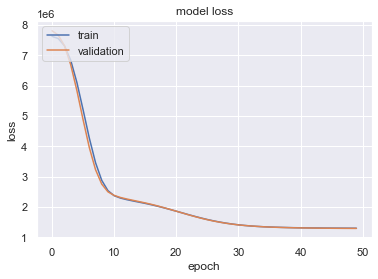

In [315]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [318]:
# Model architecture with 4 hidden layers and 350 neurons
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(350, activation='relu'))
model.add(Dense(350, activation='relu'))
model.add(Dense(350, activation='relu'))
model.add(Dense(350, activation='relu'))
model.add(Dense(1, activation='linear'))

In [319]:
# Compile the model
model.compile(optimizer='Adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [322]:
# Training
model.fit(x_train, y_train, epochs=50, batch_size=64)

Epoch 1/50
107/107 [==============================] - 0s 2ms/step - loss: 1182090.7500 - mean_absolute_error: 760.5393
Epoch 2/50
107/107 [==============================] - 0s 2ms/step - loss: 1169166.0000 - mean_absolute_error: 757.9774
Epoch 3/50
107/107 [==============================] - 0s 2ms/step - loss: 1151248.1250 - mean_absolute_error: 749.9901
Epoch 4/50
107/107 [==============================] - 0s 2ms/step - loss: 1150826.5000 - mean_absolute_error: 748.5983
Epoch 5/50
107/107 [==============================] - 0s 2ms/step - loss: 1169894.5000 - mean_absolute_error: 755.1547
Epoch 6/50
107/107 [==============================] - 0s 2ms/step - loss: 1159170.1250 - mean_absolute_error: 753.6832
Epoch 7/50
107/107 [==============================] - 0s 2ms/step - loss: 1157600.1250 - mean_absolute_error: 751.1430
Epoch 8/50
107/107 [==============================] - 0s 2ms/step - loss: 1137846.7500 - mean_absolute_error: 745.6006
Epoch 9/50
107/107 [============================

In [323]:
# Evaluate the new model
model.evaluate(x_test, y_test)

54/54 [==============================] - 0s 1ms/step - loss: 1292792.3750 - mean_absolute_error: 794.8405


[1292792.375, 794.8404541015625]

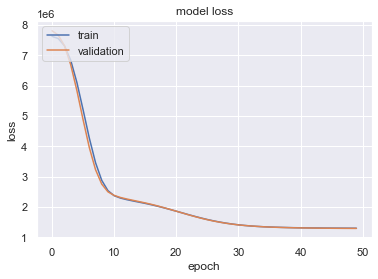

In [324]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()